In [1]:
# My first project ~ Md Saquib Ansari
# B.tech CS(DS)      Roll No. 627/25

#Project --> INC 5000 Companies 2019

##Install Libraries

In [2]:
!pip install pandas matplotlib openpyxl


##Upload Your File

In [5]:
from google.colab import files
uploaded = files.upload()   # choose the file when prompted


Saving Inc_5000_Companies_2019.xlsx to Inc_5000_Companies_2019.xlsx


##Load the Dataset

In [6]:
import pandas as pd

# pick the uploaded file name exactly as shown above
file_name = list(uploaded.keys())[0]

# load depending on file type
if file_name.lower().endswith(('.xls', '.xlsx')):
    df = pd.read_excel(file_name, engine='openpyxl')
else:
    df = pd.read_csv(file_name)

print("✅ Dataset loaded successfully!")
print("Rows × Columns:", df.shape)
df.head()


✅ Dataset loaded successfully!
Rows × Columns: (5012, 14)


,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


##Clean the Data

###(1) Check what your columns look like

In [7]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


###(2) Convert “revenue” from text → numbers

In [8]:
def convert_revenue(value):
    if isinstance(value, str):
        value = value.replace('$','').replace(',','').strip()
        if 'Billion' in value:
            return float(value.replace('Billion','')) * 1e9
        elif 'Million' in value:
            return float(value.replace('Million','')) * 1e6
    try:
        return float(value)
    except:
        return None

df['revenue_num'] = df['revenue'].apply(convert_revenue)


###(3) Handle missing values

In [9]:
df['workers'] = df['workers'].fillna(df['workers'].median())
df['growth_%'] = df['growth_%'].fillna(df['growth_%'].mean())


In [ ]:
df[['name','revenue','revenue_num','growth_%','workers']].head(10)


###(4) Verify cleaning

In [10]:
df[['name','revenue','revenue_num','growth_%','workers']].head(10)


,name,revenue,revenue_num,growth_%,workers
0,Freestar,36.9 Million,36900000.0,36680.3882,40.0
1,FreightWise,33.6 Million,33600000.0,30547.9317,39.0
2,Cece's Veggie Co.,24.9 Million,24900000.0,23880.4852,190.0
3,LadyBoss,32.4 Million,32400000.0,21849.8925,57.0
4,Perpay,22.5 Million,22500000.0,18166.4070,25.0
5,Cano Health,271.8 Million,271800000.0,14183.4118,742.0
6,Bear Mattress,20.5 Million,20500000.0,13480.7310,12.0
7,Connected Solutions Group,23.3 Million,23300000.0,12700.6588,72.0
8,Providence Healthcare Management,225.9 Million,225900000.0,12564.5364,60.0
9,NOM,21.4 Million,21400000.0,11996.2964,37.0


#***Basic Analysis***



In [11]:
# Preprocessing cell — run once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If you haven't loaded df yet, load from the uploaded file:
# file_name = list(uploaded.keys())[0]
# df = pd.read_excel(file_name, engine='openpyxl')

# 1) Revenue -> numeric
def convert_revenue(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, (int,float)):
        return float(value)
    s = str(value).replace('$','').replace(',','').strip()
    # common words
    if 'Billion' in s or 'billion' in s:
        s = s.replace('Billion','').replace('billion','').strip()
        try: return float(s) * 1e9
        except: return np.nan
    if 'Million' in s or 'million' in s:
        s = s.replace('Million','').replace('million','').strip()
        try: return float(s) * 1e6
        except: return np.nan
    # fallback
    try:
        return float(s)
    except:
        return np.nan

df['revenue_num'] = df['revenue'].apply(convert_revenue)

# 2) workers -> numeric (some files show float already)
df['workers'] = pd.to_numeric(df['workers'], errors='coerce')
df['previous_workers'] = pd.to_numeric(df['previous_workers'], errors='coerce')

# 3) growth_% numeric
df['growth_%'] = pd.to_numeric(df['growth_%'], errors='coerce')

# 4) fill simple missing values (you can change strategy)
df['workers'] = df['workers'].fillna(df['workers'].median())
df['previous_workers'] = df['previous_workers'].fillna(df['previous_workers'].median())
df['growth_%'] = df['growth_%'].fillna(df['growth_%'].mean())

# 5) staff change
df['change_in_staff'] = df['workers'] - df['previous_workers']

print("Rows, Columns:", df.shape)
display(df[['name','revenue','revenue_num','growth_%','workers','previous_workers']].head(5))


Rows, Columns: (5012, 16)


,name,revenue,revenue_num,growth_%,workers,previous_workers
0,Freestar,36.9 Million,36900000.0,36680.3882,40.0,5
1,FreightWise,33.6 Million,33600000.0,30547.9317,39.0,8
2,Cece's Veggie Co.,24.9 Million,24900000.0,23880.4852,190.0,10
3,LadyBoss,32.4 Million,32400000.0,21849.8925,57.0,2
4,Perpay,22.5 Million,22500000.0,18166.4070,25.0,6


#1) Average revenue overall and by industry

In [12]:
# 1. Average revenue overall
avg_revenue_overall = df['revenue_num'].mean()
print("Average revenue (all companies):", avg_revenue_overall)

# Average revenue by industry (sorted descending)
avg_revenue_by_industry = df.groupby('industry', dropna=False)['revenue_num'].mean().sort_values(ascending=False)
display(avg_revenue_by_industry.head(20))   # show top 20 industries by avg revenue


Average revenue (all companies): 47470830.007980846


,revenue_num
industry,
Security,1.237478e+08
Health,1.093301e+08
Logistics & Transportation,1.012930e+08
Energy,8.022179e+07
Human Resources,7.358217e+07
Consumer Products & Services,7.207365e+07
Retail,6.655276e+07
Government Services,5.939195e+07
Insurance,5.874286e+07


#2) Which industries are most and least represented ?

In [13]:
# Industry representation
industry_counts = df['industry'].value_counts()
print("Most represented industries (top 10):")
display(industry_counts.head(10))

print("\nLeast represented industries (bottom 10):")
display(industry_counts.tail(10))


Most represented industries (top 10):


,count
industry,
Business Products & Services,492
Advertising & Marketing,489
Software,461
Health,356
Construction,350
Consumer Products & Services,315
IT Management,276
Financial Services,239
Government Services,236



Least represented industries (bottom 10):


,count
industry,
Telecommunications,79
Energy,78
Insurance,70
Education,70
Security,67
Travel & Hospitality,57
Media,46
Environmental Services,43
IT Services,43


#3) Geographic trends — divide states into zones and analyze

Companies by zone:


,count
zone,
South,1811
West,1333
Northeast,995
Midwest,860
Other,13



Average growth% by zone:


,growth_%
zone,
Midwest,361.043524
Northeast,462.856248
Other,344.241962
South,450.421388
West,515.850546



Average revenue by zone:


,revenue_num
zone,
Midwest,6.901279e+07
Northeast,3.835206e+07
Other,1.823846e+07
South,4.462198e+07
West,4.453488e+07


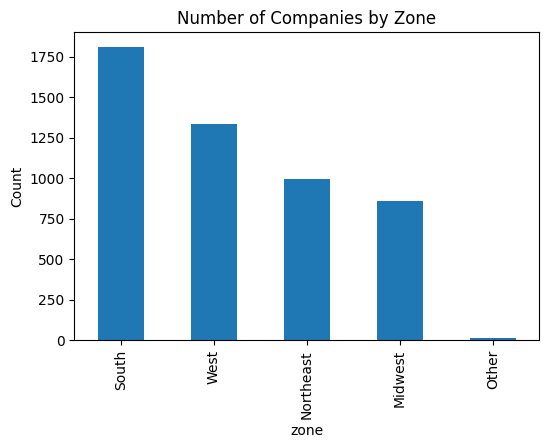

In [14]:
# Geographic trends by zones
zones = {
    'West': ['CA','WA','OR','NV','AZ','UT','CO','ID','MT','WY','NM'],
    'South': ['TX','FL','GA','AL','MS','SC','NC','TN','LA','AR','OK','VA','KY'],
    'Midwest': ['IL','OH','MI','MN','WI','IN','MO','IA','KS','NE','SD','ND'],
    'Northeast': ['NY','NJ','PA','MA','CT','RI','NH','VT','ME','MD','DE','DC']
}

def find_zone(s):
    if pd.isna(s): return 'Other'
    s = str(s).strip()
    for zone, states in zones.items():
        if s in states:
            return zone
    return 'Other'

df['zone'] = df['state'].apply(find_zone)

# Summary by zone
zone_counts = df['zone'].value_counts()
zone_avg_growth = df.groupby('zone')['growth_%'].mean()
zone_avg_revenue = df.groupby('zone')['revenue_num'].mean()

print("Companies by zone:")
display(zone_counts)
print("\nAverage growth% by zone:")
display(zone_avg_growth)
print("\nAverage revenue by zone:")
display(zone_avg_revenue)

# Quick bar chart for distribution
plt.figure(figsize=(6,4))
zone_counts.plot(kind='bar')
plt.title("Number of Companies by Zone")
plt.ylabel("Count")
plt.show()


#4) Industries with largest average growth rate

In [15]:
# Industries by average growth
growth_by_industry = df.groupby('industry')['growth_%'].mean().sort_values(ascending=False)
display(growth_by_industry.head(20))  # top 20 industries by average growth

# also show counts so you don't mistake tiny-sample highs
industry_summary = df.groupby('industry').agg(
    count_companies = ('name','count'),
    avg_growth = ('growth_%','mean'),
    avg_revenue = ('revenue_num','mean')
).sort_values('avg_growth', ascending=False)

display(industry_summary.head(20))


,growth_%
industry,
Logistics & Transportation,717.563346
Consumer Products & Services,685.640300
Food & Beverage,668.225534
Computer Hardware,651.975244
Energy,592.075591
Retail,584.823802
Health,546.911881
Software,524.673761
Telecommunications,515.411890


,count_companies,avg_growth,avg_revenue
industry,,,
Logistics & Transportation,186,717.563346,1.012930e+08
Consumer Products & Services,315,685.640300,7.207365e+07
Food & Beverage,127,668.225534,3.985591e+07
Computer Hardware,32,651.975244,3.117812e+07
Energy,78,592.075591,8.022179e+07
Retail,163,584.823802,6.655276e+07
Health,356,546.911881,1.093301e+08
Software,461,524.673761,2.157397e+07
Telecommunications,79,515.411890,4.182532e+07


#5) Companies with largest increase in staff (Top 5) and largest decrease (Bottom 5)

In [16]:
# Staff increases/decreases
top5_hires = df.sort_values('change_in_staff', ascending=False).head(5)[['rank','name','industry','state','previous_workers','workers','change_in_staff']]
bottom5_hires = df.sort_values('change_in_staff', ascending=True).head(5)[['rank','name','industry','state','previous_workers','workers','change_in_staff']]

print("Top 5 companies with most new hires:")
display(top5_hires)

print("\nBottom 5 companies with largest staff decrease:")
display(bottom5_hires)


Top 5 companies with most new hires:


,rank,name,industry,state,previous_workers,workers,change_in_staff
1621,1617,Allied Universal,Security,CA,36469,155000.0,118531.0
3752,3743,Alorica,Business Products & Services,CA,53000,96000.0,43000.0
3403,3394,Infiniti HR,Human Resources,MD,21000,58145.0,37145.0
1336,1333,CircusTrix,Advertising & Marketing,UT,991,14730.0,13739.0
3172,3164,ScribeAmerica,Health,FL,8958,20599.0,11641.0



Bottom 5 companies with largest staff decrease:


,rank,name,industry,state,previous_workers,workers,change_in_staff
4567,4556,IDS International Government Services,Government Services,VA,682,0.0,-682.0
1076,1073,Prime Therapeutics,Health,MN,3900,3300.0,-600.0
4409,4398,Akorbi,Business Products & Services,TX,650,350.0,-300.0
4136,4127,First American Payment Systems,Financial Services,TX,1244,1001.0,-243.0
4270,4260,Integrity Services,Business Products & Services,MA,250,100.0,-150.0


#6) Companies that increased revenue while reducing staff

In [17]:
# Companies with staff ↓ but high revenue
staff_down = df[df['change_in_staff'] < 0].copy()
# show top revenue among them
staff_down_sorted_by_revenue = staff_down.sort_values('revenue_num', ascending=False).head(20)[['rank','name','industry','state','revenue_num','previous_workers','workers','change_in_staff','growth_%']]
display(staff_down_sorted_by_revenue)


,rank,name,industry,state,revenue_num,previous_workers,workers,change_in_staff,growth_%
1076,1073,Prime Therapeutics,Health,MN,2.140000e+10,3900,3300.0,-600.0,390.5654
4979,4968,Atlas Oil Company,Energy,MI,1.100000e+09,611,538.0,-73.0,53.0161
4136,4127,First American Payment Systems,Financial Services,TX,7.839000e+08,1244,1001.0,-243.0,77.1276
525,525,Quantico Tactical,Government Services,NC,4.925000e+08,80,37.0,-43.0,831.3181
2715,2707,NCWC,Advertising & Marketing,NJ,1.958000e+08,125,54.0,-71.0,142.2609
4540,4529,Myriad360,IT Management,NY,1.514000e+08,96,93.0,-3.0,64.8031
4153,4144,Centrify,Software,CA,1.146000e+08,338,211.0,-127.0,76.4500
4367,4356,Republic Bank of Chicago,Financial Services,IL,1.095000e+08,285,281.0,-4.0,69.3883
4059,4050,AEC Group,IT Services,PA,9.770000e+07,127,123.0,-4.0,79.7589
4433,4422,Momentum Telecom,Telecommunications,GA,9.760000e+07,395,384.0,-11.0,67.4205


#7) Top 1000 — Winner State (most frequent state among top 1000 ranks)


In [18]:
# Winner State in Top 1000
top_1000 = df[df['rank'] <= 1000]
top1000_state_counts = top_1000['state'].value_counts()
winner_state = top1000_state_counts.idxmax()
print("Winner state (most frequent in Top 1000):", winner_state)
display(top1000_state_counts.head(10))


Winner state (most frequent in Top 1000): CA


,count
state,
CA,170
TX,82
NY,79
FL,78
VA,62
GA,44
IL,43
MD,36
CO,34


#8) Any company founded last year and ranked under Top 100

In [19]:
# Companies founded in previous year and rank <= 100
project_year = 2019
founded_last_year = project_year - 1

recent_top = df[(df['founded'] == founded_last_year) & (df['rank'] <= 100)]
print(f"Companies founded in {founded_last_year} and ranked <= 100: (count = {len(recent_top)})")
display(recent_top[['rank','name','founded','industry','state','growth_%','revenue_num']])


Companies founded in 2018 and ranked <= 100: (count = 0)


,rank,name,founded,industry,state,growth_%,revenue_num


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rank']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rank'}, axis=1)
              .sort_values('rank', ascending=True))
  xs = counted['rank']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('rank', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rank')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['founded']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'founded'}, axis=1)
              .sort_values('founded', ascending=True))
  xs = counted['founded']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('founded', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('founded')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['growth_%']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'growth_%'}, axis=1)
              .sort_values('growth_%', ascending=True))
  xs = counted['growth_%']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('growth_%', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('growth_%')
_ = plt.ylabel('count()')

#THE END